In [27]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from car import Car
from road import Road
from simulation import Simulation, main
import statistics
%matplotlib inline

In [28]:
sim = Simulation()
car_list = sim.get_final_velocity()

In [29]:
car_means = Simulation.get_car_means(car_list)

In [30]:
speed_limit = Simulation.get_speed_limit(car_means)

(0, 60)

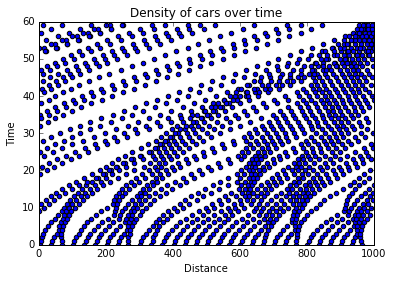

In [31]:
fig, ax = plt.subplots()
for car in car_list:
    ax.scatter(car.position_list[:60], range(60))
plt.title('Density of cars over time')
plt.xlabel('Distance')
plt.ylabel('Time')
ax.set_xlim(0, 1000)
ax.set_ylim(0, 60)